--- Iniciando Gráfico 1: Estaciones Extremas (en Celsius) ---
Cargando y procesando: Verano Año 1...
Cargando y procesando: Invierno Año 1...
Cargando y procesando: Verano Año 2...
Cargando y procesando: Invierno Año 2...
Generando gráfico y guardando en 'grafico_02a_temp_estaciones_extremas.png'...


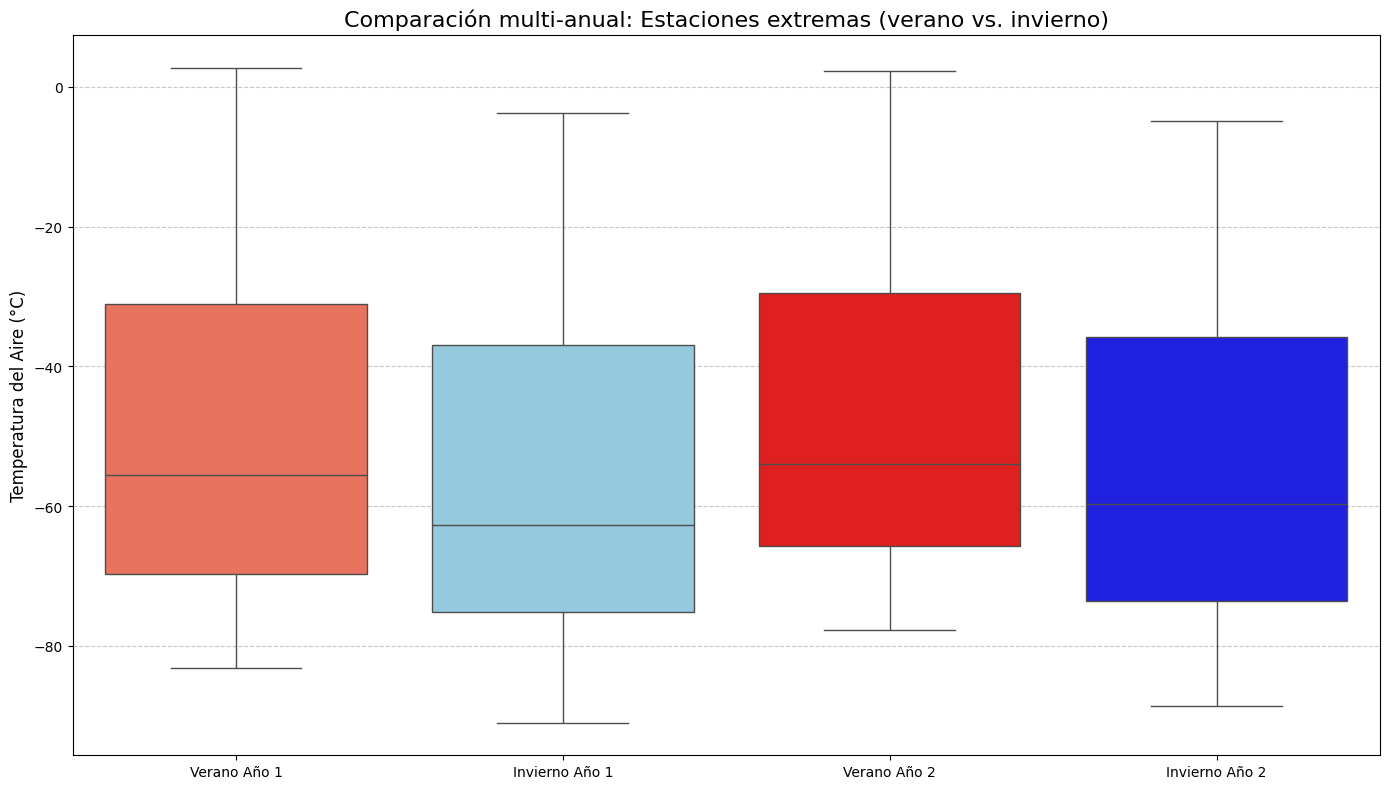

Memoria del Gráfico 1 liberada. Archivo guardado: 'grafico_02a_temp_estaciones_extremas.png'.


--- Iniciando Gráfico 2: Estaciones de Transición (en Celsius) ---
Cargando y procesando: Primavera Año 1...
Cargando y procesando: Otoño Año 1...
Cargando y procesando: Primavera Año 2...
Cargando y procesando: Otoño Año 2...
Generando gráfico y guardando en 'grafico_02b_temp_estaciones_transicion.png'...


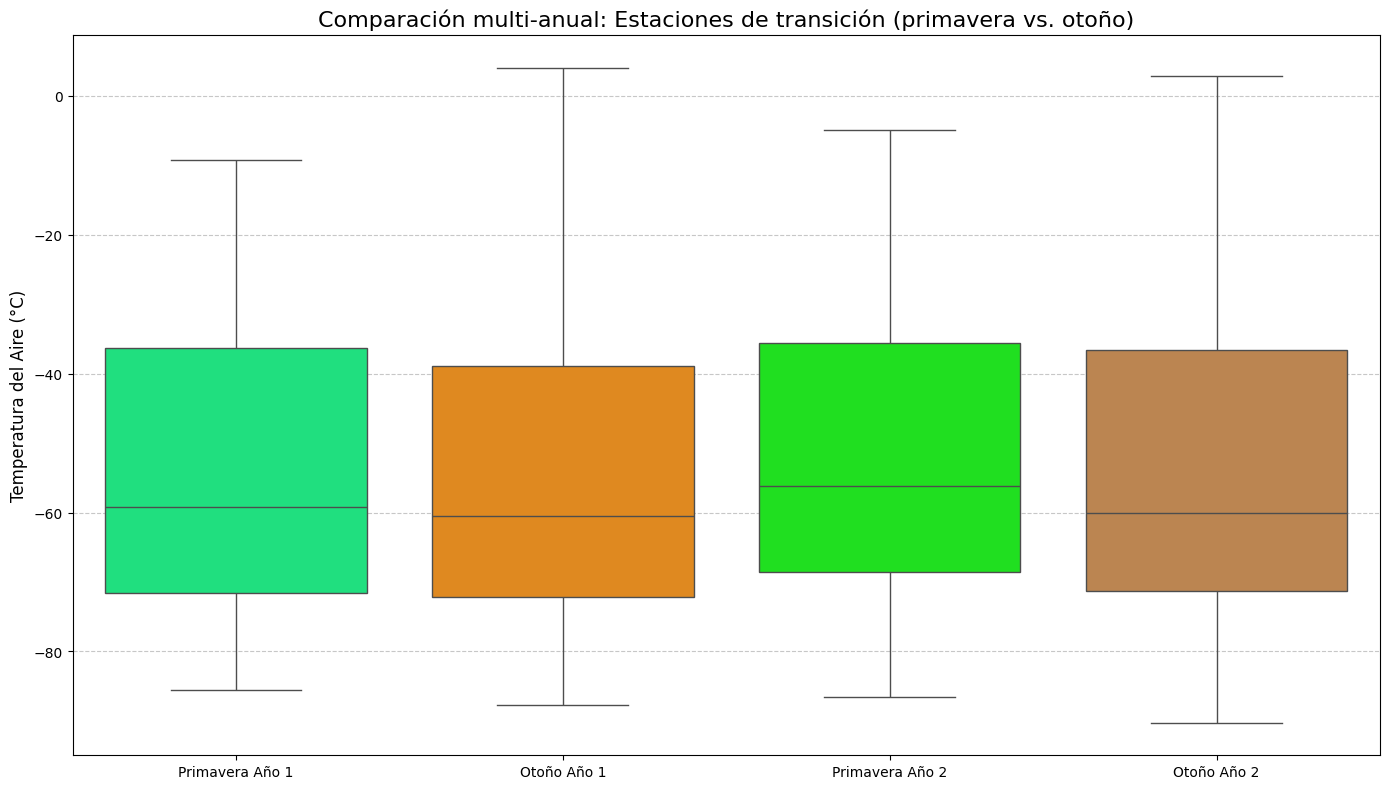

Memoria del Gráfico 2 liberada. Archivo guardado: 'grafico_02b_temp_estaciones_transicion.png'.

Script finalizado con éxito.


In [1]:
# -*- coding: utf-8 -*-
"""
Análisis Comparativo Multi-Anual de Temperaturas Estacionales en Marte.
Genera dos gráficos de forma secuencial:
1. Compara las estaciones extremas: Verano vs. Invierno.
2. Compara las estaciones de transición: Primavera vs. Otoño.
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CONFIGURACIÓN DEL GRÁFICO Y ANÁLISIS ---

# Parámetros del gráfico
TAMAÑO_FIGURA = (14, 8)
RESOLUCION_DPI = 300
# Los nombres de archivo se definirán más adelante, antes de cada gráfico.

# Parámetros del análisis
ARCHIVO_CALIBRADO = 'dataset_meda_calibrated_data.parquet'
MUESTRA_POR_ESTACION = 200000

# --- 2. GRÁFICO 1: ESTACIONES EXTREMAS (VERANO / INVIERNO) ---

print("--- Iniciando Gráfico 1: Estaciones Extremas (en Celsius) ---")
estaciones_extremas = {
    "Verano Año 1": (194, 372), "Invierno Año 1": (515, 668),
    "Verano Año 2": (862, 1040), "Invierno Año 2": (1183, 1336)
}
lista_muestras_extremos = []

for nombre_estacion, (sol_inicio, sol_fin) in estaciones_extremas.items():
    print(f"Cargando y procesando: {nombre_estacion}...")
    df_estacion = pd.read_parquet(
        ARCHIVO_CALIBRADO,
        filters=[('sol', '>=', sol_inicio), ('sol', '<=', sol_fin)]
    )
    if not df_estacion.empty:
        df_estacion['ATS_LOCAL_TEMP1_C'] = df_estacion['ATS_LOCAL_TEMP1'] - 273.15
        
        muestra = df_estacion.sample(n=min(len(df_estacion), MUESTRA_POR_ESTACION), random_state=42)
        muestra['estacion'] = nombre_estacion
        lista_muestras_extremos.append(muestra)

if lista_muestras_extremos:
    df_extremos = pd.concat(lista_muestras_extremos, ignore_index=True)
    
    # --- Creación del Gráfico 1 ---
    nombre_archivo_1 = "grafico_02a_temp_estaciones_extremas.png"
    print(f"Generando gráfico y guardando en '{nombre_archivo_1}'...")
    plt.figure(figsize=TAMAÑO_FIGURA)
    
    orden_extremos = ['Verano Año 1', 'Invierno Año 1', 'Verano Año 2', 'Invierno Año 2']
    
    sns.boxplot(data=df_extremos, x='estacion', y='ATS_LOCAL_TEMP1_C', 
                hue='estacion', legend=False,
                order=orden_extremos, palette=['tomato', 'skyblue', 'red', 'blue'])
    
    plt.title('Comparación multi-anual: Estaciones extremas (verano vs. invierno)', fontsize=16)
    plt.xlabel('')
    plt.ylabel('Temperatura del Aire (°C)', fontsize=12)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # --- Guardado y Visualización 1 ---
    plt.savefig(nombre_archivo_1, dpi=RESOLUCION_DPI, bbox_inches='tight')
    plt.show()

    del df_extremos
    del lista_muestras_extremos
    print(f"Memoria del Gráfico 1 liberada. Archivo guardado: '{nombre_archivo_1}'.")
else:
    print("No se encontraron datos para el gráfico de estaciones extremas.")

print("\n" + "="*50 + "\n")

# --- 3. GRÁFICO 2: ESTACIONES DE TRANSICIÓN (PRIMAVERA / OTOÑO) ---

print("--- Iniciando Gráfico 2: Estaciones de Transición (en Celsius) ---")
estaciones_transicion = {
    "Primavera Año 1": (0, 194), "Otoño Año 1": (372, 515),
    "Primavera Año 2": (668, 862), "Otoño Año 2": (1040, 1183)
}
lista_muestras_transicion = []

for nombre_estacion, (sol_inicio, sol_fin) in estaciones_transicion.items():
    print(f"Cargando y procesando: {nombre_estacion}...")
    df_estacion = pd.read_parquet(
        ARCHIVO_CALIBRADO,
        filters=[('sol', '>=', sol_inicio), ('sol', '<=', sol_fin)]
    )
    if not df_estacion.empty:
        df_estacion['ATS_LOCAL_TEMP1_C'] = df_estacion['ATS_LOCAL_TEMP1'] - 273.15

        muestra = df_estacion.sample(n=min(len(df_estacion), MUESTRA_POR_ESTACION), random_state=42)
        muestra['estacion'] = nombre_estacion
        lista_muestras_transicion.append(muestra)

if lista_muestras_transicion:
    df_transicion = pd.concat(lista_muestras_transicion, ignore_index=True)

    # --- Creación del Gráfico 2 ---
    nombre_archivo_2 = "grafico_02b_temp_estaciones_transicion.png"
    print(f"Generando gráfico y guardando en '{nombre_archivo_2}'...")
    plt.figure(figsize=TAMAÑO_FIGURA)
    
    orden_transicion = ['Primavera Año 1', 'Otoño Año 1', 'Primavera Año 2', 'Otoño Año 2']
    
    sns.boxplot(data=df_transicion, x='estacion', y='ATS_LOCAL_TEMP1_C', 
                hue='estacion', legend=False,
                order=orden_transicion, palette=['springgreen', 'darkorange', 'lime', 'peru'])

    plt.title('Comparación multi-anual: Estaciones de transición (primavera vs. otoño)', fontsize=16)
    plt.xlabel('')
    plt.ylabel('Temperatura del Aire (°C)', fontsize=12)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # --- Guardado y Visualización 2 ---
    plt.savefig(nombre_archivo_2, dpi=RESOLUCION_DPI, bbox_inches='tight')
    plt.show()
    
    del df_transicion
    del lista_muestras_transicion
    print(f"Memoria del Gráfico 2 liberada. Archivo guardado: '{nombre_archivo_2}'.")
else:
    print("No se encontraron datos para el gráfico de estaciones de transición.")

print("\nScript finalizado con éxito.")

Análisis sobre la Habitabilidad en Marte a partir de las Temperaturas Corregidas (Datos MEDA)
1. Panorama general

Los gráficos muestran que la temperatura del aire en Marte se mantiene muy por debajo de los valores compatibles con la vida humana en superficie durante todo el ciclo anual.

Los valores medianos se sitúan entre −60 °C y −50 °C según la estación.

Incluso en los momentos más benignos (verano), las temperaturas rara vez superan los −20 °C, con picos aislados cercanos a 0 °C.

En el extremo opuesto, durante los inviernos, se alcanzan mínimos de alrededor de −90 °C.

Esto implica que el entorno marciano es sistemáticamente hostil, independientemente de la estación o del año considerado.

2. Variación estacional y multi-anual

Estaciones extremas (verano/invierno):
Los veranos muestran medianas algo más elevadas, pero siguen dentro de rangos letales para la biología terrestre no adaptada. Los inviernos presentan no solo temperaturas más bajas, sino también una dispersión amplia, con descensos extremos más frecuentes.

Estaciones de transición (primavera/otoño):
Las gráficas revelan valores intermedios entre los extremos, pero sin cambios significativos en términos de habitabilidad: las medianas permanecen cercanas a −60 °C y las oscilaciones pueden ser bruscas.

Comparación Año 1 vs. Año 2:
Se observa consistencia en el patrón: el clima marciano es predecible en su hostilidad, lo que facilita la planificación técnica pero no mejora las perspectivas de vida en superficie.

3. Implicancias para la habitabilidad

Supervivencia biológica: Las temperaturas están muy por debajo del rango en el que el agua puede permanecer líquida de forma estable, lo cual impide la vida tal como la conocemos en superficie.

Requerimientos tecnológicos: Para establecer asentamientos humanos se necesita infraestructura capaz de mantener temperaturas internas cercanas a 20 °C, lo que supone altos costos energéticos de climatización.

Analogía terrestre: Aun en los entornos más fríos de la Antártida, las condiciones no son tan extremas ni tan constantes como en Marte. Esto refuerza la idea de que la colonización marciana exige tecnologías más cercanas a las de una nave espacial que a las de una base polar.

Ciclos térmicos: La fuerte variabilidad diaria y estacional añade un desafío adicional: los materiales y equipos deben soportar cambios de decenas de grados en lapsos cortos, algo que compromete la durabilidad y la eficiencia energética.

4. Conclusión

Los datos de temperatura recogidos por MEDA confirman que Marte es, desde el punto de vista térmico, un planeta inhóspito para la vida humana. Ninguna estación ofrece condiciones habitables en superficie.

La habitabilidad natural es nula: no hay lugar ni momento en el que el ser humano pueda subsistir sin protección.
La habitabilidad artificial es posible, pero solo mediante hábitats cerrados, con aislamiento térmico extremo y sistemas energéticos robustos capaces de sostener un microclima terrestre en un entorno hostil.

En síntesis, las gráficas ponen en evidencia que el mayor obstáculo para vivir en Marte no es solo la falta de oxígeno, sino también un clima que oscila siempre entre lo gélido y lo letal.